In [43]:
# Import necessary libraries and set random seeds for reproducibility
import torch
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(6)

# Device configuration
if torch.cuda.is_available():
    torch.cuda.manual_seed(6)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

import random
random.seed(6)

import numpy as np
np.random.seed(6)
import matplotlib.pyplot as plt

In [44]:
# Transform function to apply to each image
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

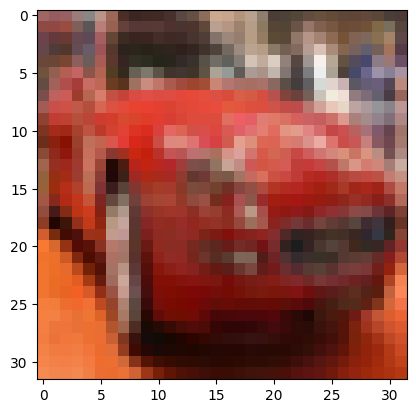

car


In [45]:
# Show image to verify the dataset
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


image, label = trainset[5]

# show images
imshow(image)
# print labels
print(classes[label])

In [46]:
# Convolutional Neural Network with two convolutional layers and one fully connected layer
from torch import nn
get_net = lambda: nn.Sequential(
    nn.Conv2d(3, 64, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(64, 64, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(64, 128, 5),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(128, 1000),
    nn.ReLU(),
    nn.Linear(1000, 10),
).to(device)

In [47]:
from math import ceil
from my_adam import My_adam, My_adamax
# Define the loss function and optimizers
criterion = nn.CrossEntropyLoss().to(device)
optimizers = [My_adam, My_adamax, torch.optim.SGD, torch.optim.Adagrad, torch.optim.RMSprop]

n_batches = ceil(len(trainset)/batch_size)
n_epochs = 20

# Variables to store loss history
n_datatpoints = n_batches * n_epochs
losses = []

# Train the model with different optimizers
for get_opt in optimizers:
    net = get_net()
    optimizer = get_opt(net.parameters(), lr=0.001)
    loss_log = torch.zeros(n_datatpoints, device=device)
    for epoch in range(n_epochs):
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            loss_log[i + n_batches*epoch] = loss
    losses.append(loss_log.detach().cpu())

print('Finished Training')

Finished Training


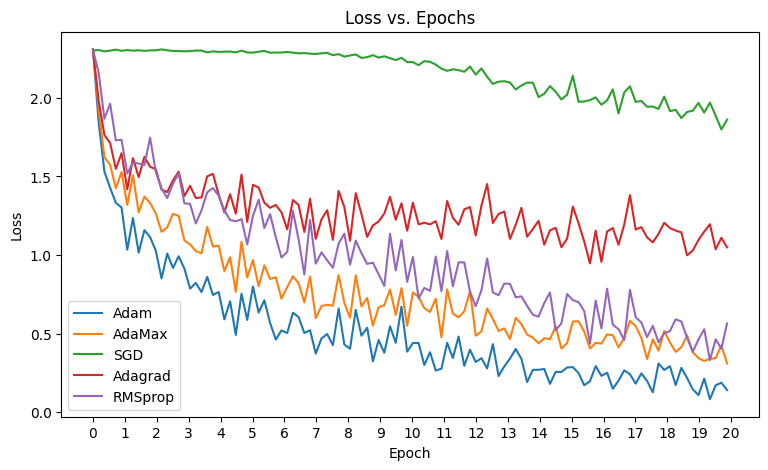

In [48]:
step = 70
x = np.arange(0, n_datatpoints, step)
plt.figure(figsize=(9, 5))
plt.plot(x,losses[0][::step], label='Adam')
plt.plot(x,losses[1][::step], label='AdaMax')
plt.plot(x,losses[2][::step], label='SGD')
plt.plot(x,losses[3][::step], label='Adagrad')
plt.plot(x,losses[4][::step], label='RMSprop')
plt.xticks(np.arange(0, n_datatpoints+1, n_batches), np.arange(0, n_epochs+1))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()